# Import Library

In [54]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns
import joblib
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_validate

# Ambil dan baca dataset

In [55]:
filedata="D:\DatasetUAS_FaradhiaAuraRisma.csv"
data= pd.read_csv(filedata,delimiter=";")
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,2
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,2
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,1
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,1
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,1


# Pemisahan Data

In [56]:
#Ambil label dari setiap baris
label=data.iloc[:,-1:].values.ravel()
label

array([2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2,
       1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [57]:
#Ambil feature data
feature=data.iloc[:,1:-1]
feature.values

array([[69,  1,  2, ...,  2,  2,  2],
       [74,  2,  1, ...,  2,  2,  2],
       [59,  1,  1, ...,  2,  1,  2],
       ...,
       [58,  2,  1, ...,  1,  1,  2],
       [67,  2,  1, ...,  2,  1,  2],
       [62,  1,  1, ...,  1,  2,  1]], dtype=int64)

In [58]:
#untuk mengetahui apakah terdapat data yang kosong
data.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [59]:
#untuk mengetahui statistik dari dataset
data.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634,1.873786
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588,0.332629
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


<Figure size 36000x7200 with 0 Axes>

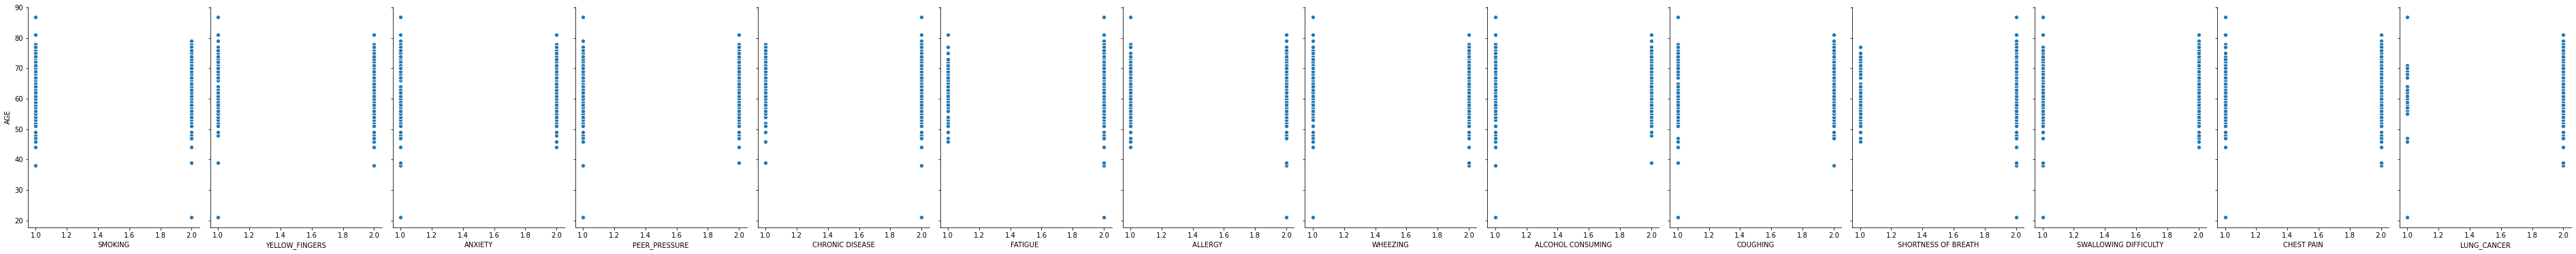

In [60]:
#bivariet analisis menggunakan pairplot untuk melihat hubungan masing-masing variabel
plt.figure(figsize=(500,100))
sns.pairplot(data, x_vars=['SMOKING','YELLOW_FINGERS','ANXIETY','PEER_PRESSURE','CHRONIC DISEASE','FATIGUE ','ALLERGY ','WHEEZING','ALCOHOL CONSUMING','COUGHING','SHORTNESS OF BREATH','SWALLOWING DIFFICULTY','CHEST PAIN','LUNG_CANCER'],y_vars=['AGE'], height=5, aspect=0.75)
plt.show()

In [61]:
#Membuat variabel x dan y
x = feature
y = label

##split data menjadi training dan testing(train 70% dan test 30%)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3)

In [62]:
print("Jumlah data latih=" , len (x_train))
print("Jumlah data uji=", len (x_test))

Jumlah data latih= 216
Jumlah data uji= 93


# Modelling

In [63]:
#Pemodelan K-Nearest Neighbors
clf=KNeighborsClassifier(n_neighbors = 3, p=2)

#fitting data train
clf.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

# Prediksi hasil

In [64]:
pred=clf.predict(x_test)
pred

array([1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2], dtype=int64)

In [65]:
cols={
    'Y True' : y_test,
    'predict' : pred,
}
print ("Prediksi yang dihasilkan")
pd.DataFrame(cols)

Prediksi yang dihasilkan


,Y True,predict
0,1,1
1,1,1
2,2,2
3,2,2
4,2,2
...,...,...
88,2,2
89,2,2
90,2,2
91,2,2


# Pengukuran performance

In [66]:
#FOLD=10
kfold=KFold(n_splits=10)
scores=['accuracy','precision','recall']
results=cross_validate(clf,x_test,y_test,cv=kfold,scoring=scores,return_train_score=True)
results_data=pd.DataFrame(results)
results_data

C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and b

,fit_time,score_time,test_accuracy,train_accuracy,test_precision,train_precision,test_recall,train_recall
0,0.011013,0.023046,0.900000,0.939759,1.0,0.800000,0.5,0.500000
1,0.004000,0.007003,0.900000,0.927711,0.0,0.750000,0.0,0.600000
2,0.004003,0.007145,0.900000,0.939759,0.0,0.833333,0.0,0.555556
3,0.003999,0.006190,0.888889,0.952381,0.0,0.857143,0.0,0.666667
4,0.003190,0.007004,0.777778,0.952381,0.5,1.000000,0.5,0.500000
5,0.004001,0.007147,0.777778,0.928571,0.0,0.750000,0.0,0.375000
6,0.003001,0.007191,1.000000,0.940476,0.0,0.857143,0.0,0.600000
7,0.003001,0.007163,0.888889,0.952381,0.0,0.857143,0.0,0.666667
8,0.004001,0.007144,1.000000,0.940476,0.0,0.857143,0.0,0.600000
9,0.004078,0.006072,0.888889,0.928571,0.0,0.800000,0.0,0.444444


In [67]:
print("Performance Model K-Nearest Neighbors")

accuracy=results_data.test_accuracy.mean() * 100
precision=results_data.test_precision.mean() * 100
recall=results_data.test_recall.mean() * 100

print("Accuracy : %0.2f" % accuracy, "%")
print("Precision : %0.2f" % precision, "%")
print("Recall : %0.2f" % recall, "%")

Performance Model K-Nearest Neighbors
Accuracy : 89.22 %
Precision : 15.00 %
Recall : 10.00 %


Contoh kasus

Pak Ibnu berusia 42 tahun, seorang perokok aktif namun tidak mengonsumsi alkohol. Tidak memiliki penyakit kronis apapun namun memiliki keluhan baruk yang tidak berhenti dan napas putus-putus, terkadang mengalami nyeri pada dada. Sering merasa lelah dan terlihat jemarinya mulai menguning. Apakah Pak Ibnu mengidap penyakit kanker paru paru?

In [68]:
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,2
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,2
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,1
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,1
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,1


In [69]:
dtbaru=np.array([[42,2,2,1,1,1,2,1,2,1,2,2,2,2]])
dtbaru

array([[42,  2,  2,  1,  1,  1,  2,  1,  2,  1,  2,  2,  2,  2]])

In [70]:
pred_ibnu= clf.predict(dtbaru)
pred_ibnu

array([2], dtype=int64)